Using Numpy to do Bayesian Linear Regression - remove the pymc magic curtain 

In [5]:
import numpy as np
import matplotlib.pyplot as plt     

from PIL import Image


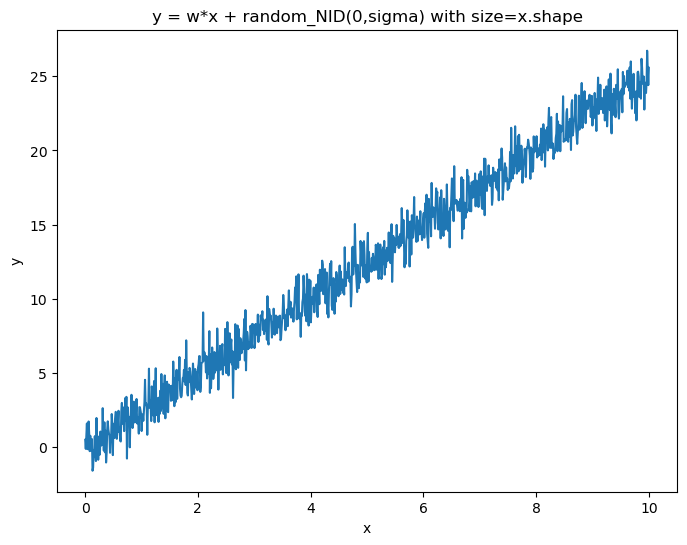

In [14]:
np.random.seed(42) # reproducibility 

# true parameters
true_w = 2.5
sigma = 1.0

# generate inputs

x = np.linspace(0,10,1000)
y = true_w * x + np.random.normal(0, sigma, size=x.shape)

plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.title('y = w*x + random_NID(0,sigma) with size=x.shape')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

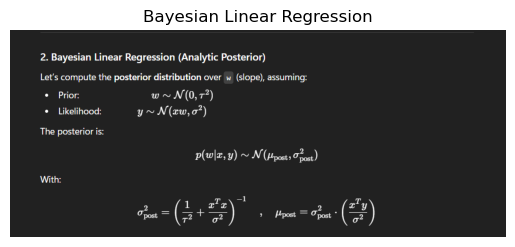

In [9]:
image = Image.open(r'D:\Dropbox\1e_Bayesian_Analysis\Bayesian-Analysis\bayes_linear_regression.png')

plt.imshow(image)
plt.axis('off')
plt.title('Bayesian Linear Regression')
plt.show()

In [ ]:
# prior variance
tau2 = 10.0 # weak prior

# likelihood variance 
sigma2 = sigma*2

# compute posterior variance 
X = x.reshape(-1,1) # column vector

XtX = np.sum(X**2)

print('x shape (one dim): ',x.shape)
print('X shape (two dim): ',X.shape)

sigma2_post = 1 / (1 / tau2 + XtX / sigma2)  # scalar
mu_post = sigma2_post * np.sum(x*y)/sigma2 # scalar

print('sigma sqr post :', sigma2_post) 
print('mu post :', mu_post)

x shape (one dim):  (1000,)
X shape (two dim):  (1000, 1)
sigma sqr post : 5.996962535474299e-05
mu post : 2.505892438530066


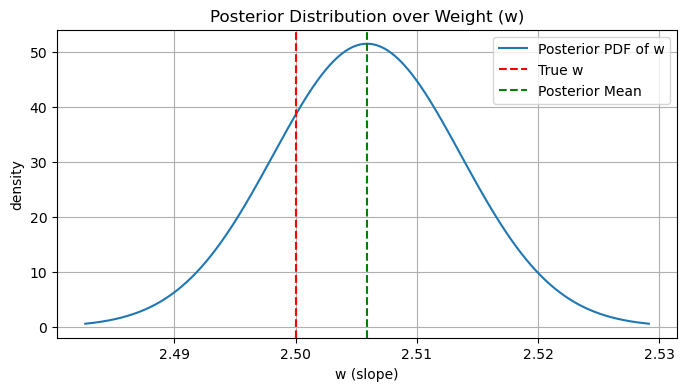

In [ ]:
# w_vals = np.linspace(mu_post - 3*np.sqrt(sigma2_post), mu_post + 3*np.sqrt(sigma2_post), 100)
# posterior_pdf = (1 / np.sqrt(2 * np.pi * sigma2_post)) * np.exp(-0.5 * ((w_vals - mu_post)**2) / sigma2_post)

# x-axis values 
w_vals = np.linspace(mu_post - 3*np.sqrt(sigma2_post), mu_post + 3*np.sqrt(sigma2_post), 1000)

# using normal dist. equn for PDF to create y-axis values 
posterior_pdf = (1 / np.sqrt(2 * np.pi * sigma2_post)) * np.exp(-0.5 * ((w_vals - mu_post)**2) / sigma2_post)

plt.figure(figsize=(8,4))
plt.plot(w_vals,posterior_pdf, label="Posterior PDF of w")
plt.axvline(true_w, color='r', linestyle='--', label='True w')
plt.axvline(mu_post, color='g', linestyle='--', label='Posterior Mean')
plt.xlabel('w (slope)')
plt.ylabel('density')
plt.title('Posterior Distribution over Weight (w)')
plt.legend()
plt.grid(True)
plt.show()
